In [17]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_curve, roc_auc_score

In [18]:
df = pd.read_csv(r"D:\csv\insurance_data_700.csv")
df

,age,bought_insurance
0,56,0
1,46,0
2,32,0
3,60,1
4,25,0
...,...,...
695,28,1
696,29,0
697,27,0
698,49,1


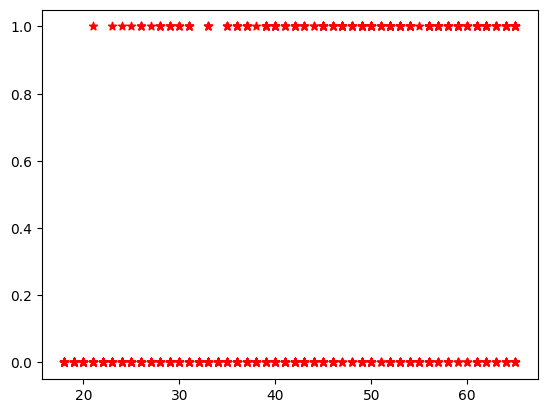

In [19]:
plt.scatter(df.age, df.bought_insurance, marker='*', color='red')

In [20]:
df.shape

(700, 2)

In [21]:
from sklearn.model_selection import train_test_split
X = df[['age']]
y = df.bought_insurance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6,random_state=35)

In [22]:
X_test

,age
42,35
542,21
114,24
376,44
491,53
...,...
1,46
428,62
562,40
567,40


In [23]:
X_train

,age
351,54
8,40
693,33
300,35
615,26
...,...
651,43
249,58
448,18
33,32


In [24]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [25]:
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [26]:
#accuracy score on test data on how well the model performed using x_test 
model.predict(X_test)

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [27]:
#accuracy score on test data because the data size is small
model.score(X_test, y_test)

0.6976190476190476

In [28]:
#class1 & class2 probabilities
#not bought & bought insurance x_test
model.predict_proba(X_test)

array([[0.7421781 , 0.2578219 ],
       [0.87979225, 0.12020775],
       [0.85698917, 0.14301083],
       [0.61240713, 0.38759287],
       [0.46445095, 0.53554905],
       [0.80068577, 0.19931423],
       [0.62810481, 0.37189519],
       [0.68798325, 0.31201675],
       [0.46445095, 0.53554905],
       [0.59647254, 0.40352746],
       [0.88666483, 0.11333517],
       [0.77855746, 0.22144254],
       [0.88666483, 0.11333517],
       [0.41522758, 0.58477242],
       [0.75472499, 0.24527501],
       [0.36763981, 0.63236019],
       [0.72921966, 0.27078034],
       [0.78983528, 0.21016472],
       [0.51437677, 0.48562323],
       [0.58033178, 0.41966822],
       [0.68798325, 0.31201675],
       [0.49771746, 0.50228254],
       [0.7668531 , 0.2331469 ],
       [0.89319218, 0.10680782],
       [0.67349921, 0.32650079],
       [0.70210895, 0.29789105],
       [0.32249814, 0.67750186],
       [0.64353679, 0.35646321],
       [0.71585926, 0.28414074],
       [0.33723024, 0.66276976],
       [0.

In [29]:
# The ROC curve is based on the probabilities
y_pred_proba = model.predict_proba(X_test)[::,1]



In [30]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)


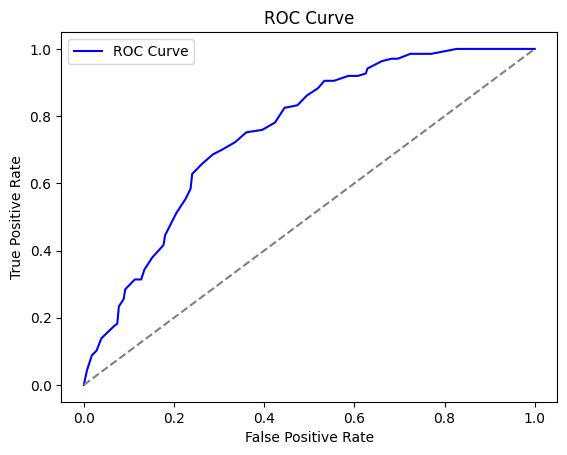

In [31]:
plt.plot(fpr, tpr, color='blue', label='ROC Curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


In [32]:
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC Score:", auc)


AUC Score: 0.7536431869180573
